In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta 
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from ma2reverse import get_data,Strategy
plt.style.use('seaborn')

In [4]:
df_dict = {}
candidate = ['ETH','BTC','BNB','SOL','MATIC',
            'XRP','DYDX','AVAX','LINK','GAS',
            'DOGE','ORDI','TRB','WLD','ADA',
            'OP','FIL','ZRX','LTC','RUNE','ATOM',
            'ARB','GMT','ETC','ARK','BCH','DOT',
            'LDO','SUI','GALA','CAKE',
            'APE','INJ','FTM','APT','YFI','OMG',
            'SEI','EOS','1000SHIB','NEAR',
            'MKR','CYBER','UNI','BLUR','SUSHI','WAVES','MASK','MANA',
            'EGLD','AAVE','NEO','FET','TRX','GRT','ALGO','STX','XLM']
for coin in candidate:
    pair = coin + 'USDT'
    df_dict[coin] = df = pd.read_hdf(f'Y:\\price_data\\binance\\1m\\{pair}_PERPETUAL.h5')

In [5]:
import pickle

with open('my_data.pkl', 'wb') as file:
    pickle.dump(df_dict, file)


In [5]:
data = pd.read_csv('/Users/johnsonhsiao/DC_capital_intern/strategy_research/CTA_TEST/Crypto/ma2reverse/5min/BTC/both_record_df.csv')

APY: 40.59 %
MDD: 8.87 %
MDD Duration 253 days 04:00:00
worst trade: -5.06 %
2022-05-15 10:50:00 ~ 2022-05-15 22:00:00
avg holding days: 0.66 days
--------------------------------------------
PF: 1.94
Sharpe Ratio: 1.93
Calmar Ratio: 3.94
Sortino Ratio: 2.74
Omega Ratio: 1.05
--------------------------------------------
Expectancy : 0.36 %
Total Time Exposure : 20.19 %
Total Trades: 216
Win Rate: 68.06 %
--------------------------------------------
PF * Win Rate: 1.319


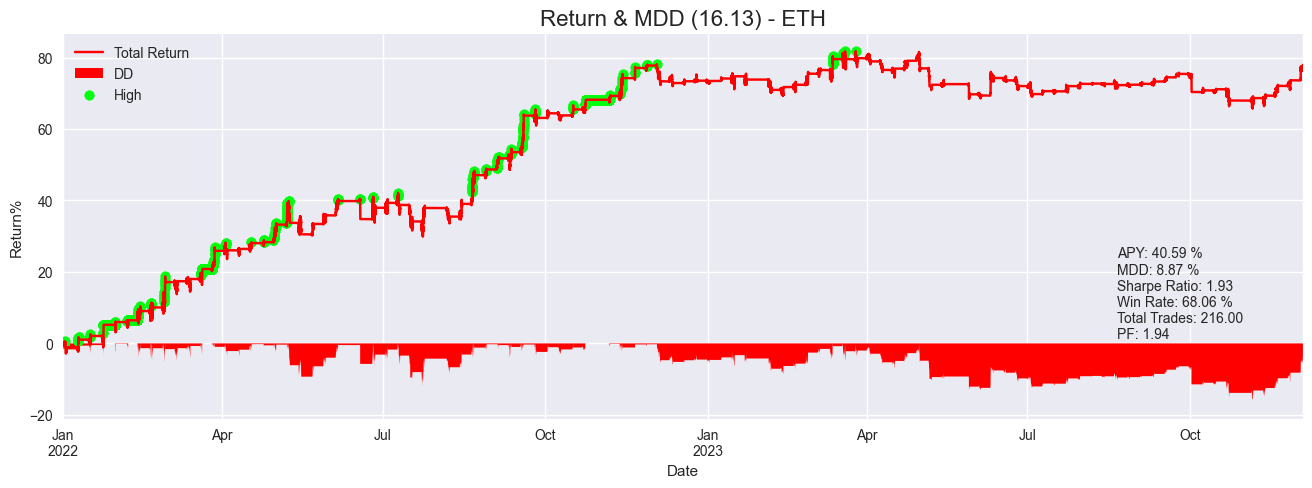

In [5]:
start = '2022-01-01'
sep = ''
end = ''

# params = eval(data['params'].iloc[i])
# print(params)
params = {'long_ma': 134, 'short_ma': 72, 'hour': 2, 'sl': 5}      
side = 'both'
config = {'freq':'5min', 'lag':1, 'fee': 0.0003, 'weekend_filter':False}
coin = 'ETH'

df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
# analyze.show_period_analysis(trades)
value = analyze.show_pf_analysis(params, side, coin, axv_index='')

In [3]:
import pickle

with open('my_data.pkl', 'rb') as file:
    df_dict = pickle.load(file)

======================= ETH B/S Optimize Test =======================
Optimization trails: 3648


100%|██████████| 3648/3648 [04:09<00:00, 14.63it/s]


Optimization time: 250.9 sec
---------- ETH B/S ----------
{'long_ma': 134, 'short_ma': 72, 'hour': 2, 'sl': 5}
APY: 57.94 %
MDD: 8.65 %
MDD Duration 99 days 11:40:00
worst trade: -5.06 %
2022-05-15 10:50:00 ~ 2022-05-15 22:00:00
avg holding days: 0.66 days
--------------------------------------------
PF: 2.35
Sharpe Ratio: 2.40
Calmar Ratio: 6.19
Sortino Ratio: 3.45
Omega Ratio: 1.06
--------------------------------------------
Expectancy : 0.53 %
Total Time Exposure : 19.82 %
Total Trades: 146
Win Rate: 69.18 %
--------------------------------------------
PF * Win Rate: 1.624


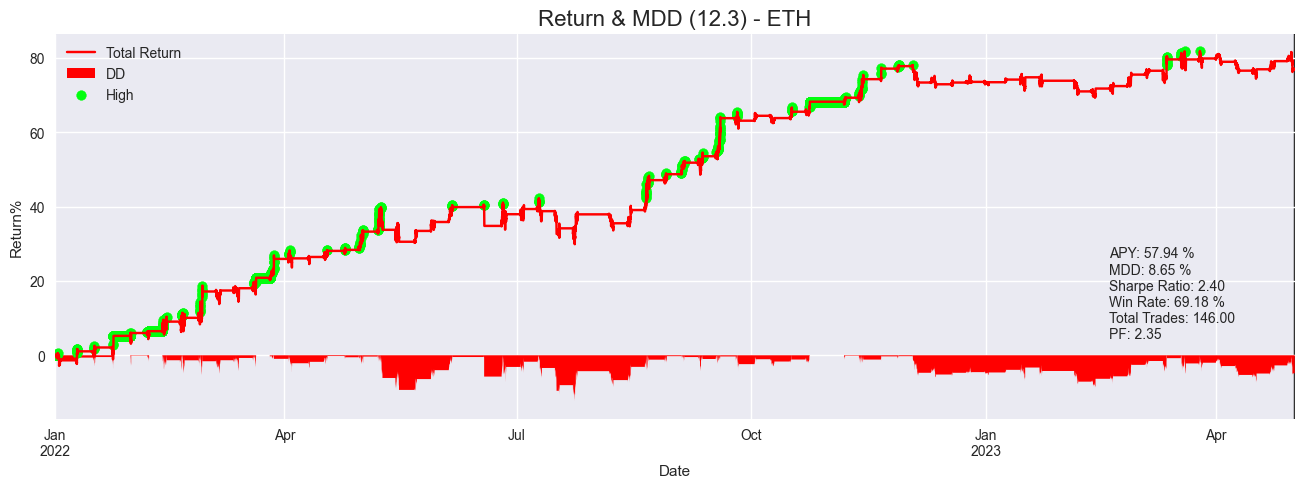

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     25.94 | 3183.54 |  -591.71 |       5.38 |   73.08 |         26 |
| 2022-06    |     12.02 | 2747.14 | -1544.76 |       1.78 |   80    |         25 |
| 2022-09    |     25.15 | 3956.95 | -1441.95 |       2.74 |   67.74 |         31 |
| 2022-12    |     10.25 | 1843.1  |  -818.21 |       2.25 |   67.86 |         28 |
| 2023-03    |      6.49 | 1324.53 |  -675.47 |       1.96 |   66.67 |         24 |
| 2023-06    |     -2.84 |  356.98 |  -641.02 |       0.56 |   50    |         12 |
+------------+-----------+---------+----------+------------+---------+------------+
======================= BTC B/S Optimize Test =======================


Traceback (most recent call last):
  File "../..\src\strategy\MultiTester.py", line 220, in run
    self.run_optimize_test(symbol,side=side,sep=sep,df_use_cache=df_use_cache)
  File "../..\src\strategy\MultiTester.py", line 127, in run_optimize_test
    record_df.to_csv(f"{self.save_path}{freq}/{symbol}/{side}_record_df.csv")
  File "c:\Users\Intern\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py", line 3772, in to_csv
    return DataFrameRenderer(formatter).to_csv(
  File "c:\Users\Intern\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\formats\format.py", line 1186, in to_csv
    csv_formatter.save()
  File "c:\Users\Intern\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\formats\csvs.py", line 240, in save
    with get_handle(
  File "c:\Users\Intern\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\common.py", line 737, in get_handle
    check_parent_directory(str(handle))
  File "c:\Users\Intern\A

Optimization trails: 3648


100%|██████████| 3648/3648 [04:13<00:00, 14.39it/s]


Optimization time: 254.94 sec
---------- BTC B/S ----------
{'long_ma': 182, 'short_ma': 36, 'hour': 2, 'sl': 5}
APY: 45.28 %
MDD: 8.73 %
MDD Duration 56 days 20:40:00
worst trade: -5.06 %
2022-04-09 14:10:00 ~ 2022-04-11 17:15:00
avg holding days: 0.65 days
--------------------------------------------
PF: 2.07
Sharpe Ratio: 1.84
Calmar Ratio: 4.86
Sortino Ratio: 2.64
Omega Ratio: 1.04
--------------------------------------------
Expectancy : 0.29 %
Total Time Exposure : 27.37 %
Total Trades: 205
Win Rate: 62.93 %
--------------------------------------------
PF * Win Rate: 1.301


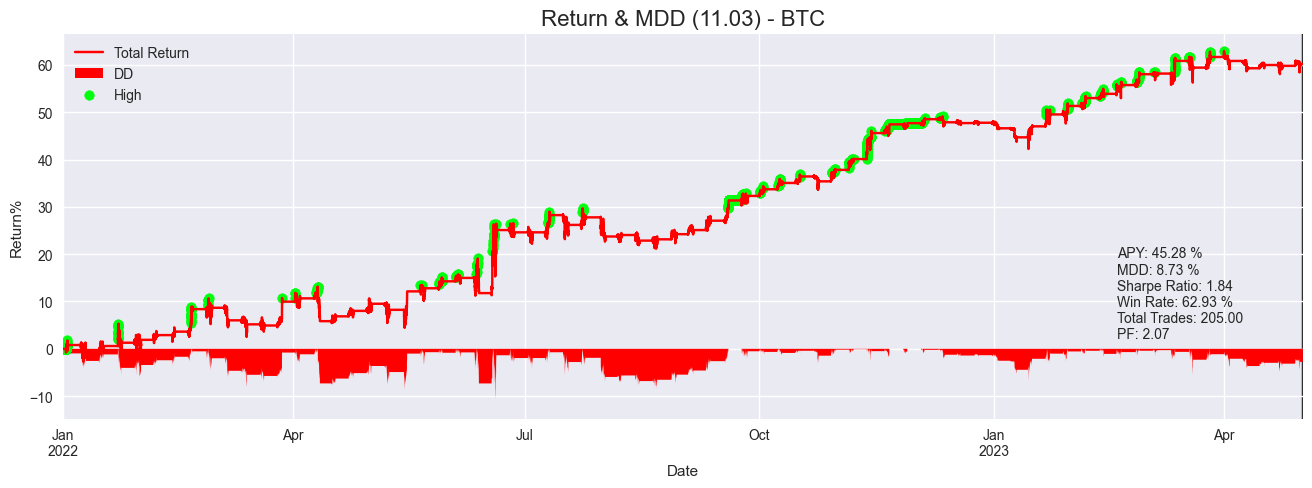

Traceback (most recent call last):
  File "../..\src\strategy\MultiTester.py", line 220, in run
    self.run_optimize_test(symbol,side=side,sep=sep,df_use_cache=df_use_cache)
  File "../..\src\strategy\MultiTester.py", line 127, in run_optimize_test
    record_df.to_csv(f"{self.save_path}{freq}/{symbol}/{side}_record_df.csv")
  File "c:\Users\Intern\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py", line 3772, in to_csv
    return DataFrameRenderer(formatter).to_csv(
  File "c:\Users\Intern\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\formats\format.py", line 1186, in to_csv
    csv_formatter.save()
  File "c:\Users\Intern\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\formats\csvs.py", line 240, in save
    with get_handle(
  File "c:\Users\Intern\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\common.py", line 737, in get_handle
    check_parent_directory(str(handle))
  File "c:\Users\Intern\A

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |      9.97 | 1900.14 |  -903.73 |       2.1  |   68.29 |         41 |
| 2022-06    |     14.65 | 3480.99 | -2016.15 |       1.73 |   69.23 |         39 |
| 2022-09    |      9.1  | 2020.16 | -1109.99 |       1.82 |   59.46 |         37 |
| 2022-12    |     13.92 | 1781.34 |  -389.3  |       4.58 |   63.16 |         38 |
| 2023-03    |     14.03 | 2258.6  |  -855.68 |       2.64 |   58.33 |         36 |
| 2023-06    |     -1.5  |  214.05 |  -364.29 |       0.59 |   50    |         14 |
+------------+-----------+---------+----------+------------+---------+------------+
======================= BNB B/S Optimize Test =======================
Optimization trails: 3648


100%|██████████| 3648/3648 [04:09<00:00, 14.64it/s]


Optimization time: 250.67 sec
---------- BNB B/S ----------
{'long_ma': 66, 'short_ma': 56, 'hour': 2, 'sl': 7}
APY: 51.62 %
MDD: 13.08 %
MDD Duration 89 days 12:45:00
worst trade: -4.06 %
2022-08-20 01:15:00 ~ 2022-08-21 22:10:00
avg holding days: 0.97 days
--------------------------------------------
PF: 2.47
Sharpe Ratio: 2.24
Calmar Ratio: 3.67
Sortino Ratio: 3.26
Omega Ratio: 1.05
--------------------------------------------
Expectancy : 0.75 %
Total Time Exposure : 18.13 %
Total Trades: 91
Win Rate: 63.74 %
--------------------------------------------
PF * Win Rate: 1.577


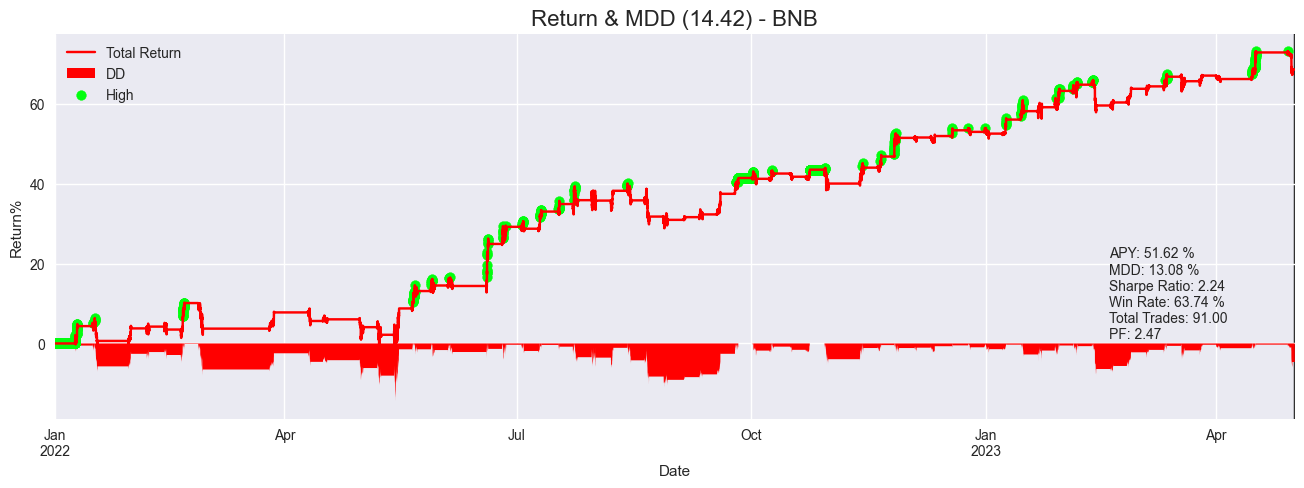

Traceback (most recent call last):
  File "../..\src\strategy\MultiTester.py", line 220, in run
    self.run_optimize_test(symbol,side=side,sep=sep,df_use_cache=df_use_cache)
  File "../..\src\strategy\MultiTester.py", line 127, in run_optimize_test
    record_df.to_csv(f"{self.save_path}{freq}/{symbol}/{side}_record_df.csv")
  File "c:\Users\Intern\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py", line 3772, in to_csv
    return DataFrameRenderer(formatter).to_csv(
  File "c:\Users\Intern\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\formats\format.py", line 1186, in to_csv
    csv_formatter.save()
  File "c:\Users\Intern\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\formats\csvs.py", line 240, in save
    with get_handle(
  File "c:\Users\Intern\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\common.py", line 737, in get_handle
    check_parent_directory(str(handle))
  File "c:\Users\Intern\A

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |      7.77 | 1920.25 | -1142.86 |       1.68 |   57.14 |         14 |
| 2022-06    |     21.44 | 3076.44 |  -932.89 |       3.3  |   66.67 |         18 |
| 2022-09    |     12.23 | 2062.62 |  -839.89 |       2.46 |   70.59 |         17 |
| 2022-12    |     11.11 | 1688    |  -576.77 |       2.93 |   55.56 |         18 |
| 2023-03    |     14.53 | 2098.91 |  -646.14 |       3.25 |   72.22 |         18 |
| 2023-06    |      1.51 |  665.54 |  -514.44 |       1.29 |   50    |          6 |
+------------+-----------+---------+----------+------------+---------+------------+
======================= SOL B/S Optimize Test =======================
Optimization trails: 3648


 86%|████████▋ | 3148/3648 [03:31<00:29, 16.92it/s]

KeyboardInterrupt: 

 86%|████████▋ | 3148/3648 [03:47<00:29, 16.92it/s]

In [4]:
import warnings
warnings.filterwarnings("ignore")

start= '2022-01-01'
end ='2023-05-01'

for freq in ['5min','15min','30min']:
    symbol_list = list(df_dict.keys())
    sample_sets = [[start,end]]
    freq = '5min'

    params = {"long_ma":[50,200,4],
            "short_ma":[4,100,4],
            "hour":[2,3,1],
            "sl":[4,8,1]}

    config = {'freq':freq,'fee': 0.0003,'weekend_filter': False}
    multi_test = MultiTester(
        Strategy,
        get_data_func=get_data,
        params=params,
        config=config,
        symbol_list=symbol_list,
        start=start,
        df_dict=df_dict,
        end=end,
        )

    all_params = multi_test.multi_params(symbol_list,sample_sets,direction='L/S')
    trades, value_df = multi_test.multi_params_result(all_params)
